In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numexpr as ne
import seaborn as sns
from time import time
from random import  random

sns.set()
%matplotlib inline


In [382]:
url= 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'
apple= pd.read_csv(url)

In [383]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [385]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [387]:
apple['Date']= pd.to_datetime(apple['Date'])

apple.set_index('Date')

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


In [388]:
apple.dtypes #check for datetime

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

In [389]:
apple.sort_index(ascending=True).head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [392]:
apple['Date'].max() - apple['Date'].min()  #check how many days

Timedelta('12261 days 00:00:00')

Text(0, 0.5, 'Close')

<Figure size 432x288 with 0 Axes>

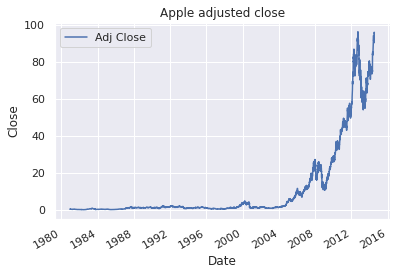

In [401]:

sns.set()
plt.figure()

apple.plot(x='Date' ,y= 'Adj Close')
plt.title('Apple adjusted close')
plt.ylabel('Close')

OR YOU CAN PARSE DATES TO CONVERT UPON READING INTO DATAFRAME

In [404]:
apple2= pd.read_csv(url, parse_dates=['Date'])
apple2

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


In [405]:
apple2.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

In [417]:
#get the month from datetime

apple2['Month']= apple2['Date'].dt.month
apple2

,Date,Open,High,Low,Close,Volume,Adj Close,Month
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,7
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,7
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,7
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,7
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,7
...,...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,12
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,12
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,12
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,12


In [423]:
#GROUP BY THE MONTH and get the mean for columns

apple2.groupby  (  [apple2['Date'].dt.month ] ).mean()


,Open,High,Low,Close,Volume,Adj Close,Month
Date,,,,,,,
1,98.109844,99.429078,96.579475,97.962794,1.268551e+08,10.636184,1
2,99.669540,101.019893,98.431304,99.773129,9.596022e+07,10.813834,2
3,101.117124,102.386989,99.854919,101.172312,9.174231e+07,11.077433,3
4,104.741778,106.132376,103.221835,104.693883,9.760923e+07,11.609075,4
5,108.536560,109.885780,107.056643,108.518287,8.511012e+07,12.087298,5
6,94.276204,95.334415,92.914787,94.069243,8.477505e+07,12.002682,6
7,90.703215,91.912859,89.478563,90.778393,8.920390e+07,10.623940,7
8,95.883890,97.114877,94.729890,95.978658,8.068310e+07,10.716151,8
9,97.375605,98.579671,96.017309,97.231046,9.131594e+07,10.856622,9


In [453]:
#group by day of month, you have to slice to specify the date column

apple2.groupby( apple2['Date'].dt.day ).mean().head()

,Open,High,Low,Close,Volume,Adj Close,Month
Date,,,,,,,
1,97.904687,99.172227,96.540586,97.875547,8.626878e+07,11.060742,6.960938
2,97.726377,98.979348,96.480181,97.740870,8.643591e+07,11.064094,6.572464
3,99.889928,101.047230,98.595036,99.879964,8.748665e+07,11.333094,6.399281
4,101.485731,102.578846,99.932154,101.236731,9.147067e+07,11.265038,6.346154
5,100.092873,101.608109,98.896836,100.405673,9.351197e+07,11.200073,6.421818


#RESAMPLE THE TIMEFRAME TO BY MONTH and yr


In [471]:
pivot=apple2.pivot_table(index='Date', values='Close')
display(pivot.head())


pivot.resample('M').mean()

,Close
Date,
1980-12-12,28.75
1980-12-15,27.25
1980-12-16,25.25
1980-12-17,25.87
1980-12-18,26.63


,Close
Date,
1980-12-31,30.443077
1981-01-31,31.654762
1981-02-28,26.407895
1981-03-31,24.836364
1981-04-30,27.227143
...,...
2014-03-31,533.214286
2014-04-30,541.074286
2014-05-31,603.195714


In [477]:
apple3= apple2.loc[:,['Date','Close','High']]
apple3

,Date,Close,High
0,2014-07-08,95.35,96.80
1,2014-07-07,95.97,95.99
2,2014-07-03,94.03,94.10
3,2014-07-02,93.48,94.06
4,2014-07-01,93.52,94.07
...,...,...,...
8460,1980-12-18,26.63,26.75
8461,1980-12-17,25.87,26.00
8462,1980-12-16,25.25,25.37
8463,1980-12-15,27.25,27.38


In [486]:

#apple3.set_index('Date', inplace=True)
apple.resample('Y').mean().head()

,level_0,index,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,,
1980-12-31,8458.0,8458.0,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-12-31,8325.5,8325.5,24.386349,24.471865,24.311151,24.311151,8.131889e+06,0.378651
1982-12-31,8073.0,8073.0,19.139723,19.412688,18.957036,19.142727,2.111167e+07,0.298261
1983-12-31,7820.5,7820.5,37.524841,38.376071,36.669841,37.521984,4.134987e+07,0.584643
1984-12-31,7568.0,7568.0,26.869960,27.393755,26.351581,26.801897,4.148126e+07,0.417787
